In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### import libraries

In [ ]:
# for data manipulation and data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To handle the imbalanced data
from imblearn.over_sampling import SMOTE

# import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# import Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

### data gathering

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI/NLP/emails.csv")
df


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


### exploratory data analysis (EDA)

In [ ]:
print("Shape:", df.shape)
print("-"*50)

print("\nInfo:")
print("-"*50)

print(df.info())
print("-"*50)

print("\nMissing values:\n", df.isnull().sum().sum())
print("-"*50)

print("\nDuplicates:", df.duplicated().sum())

Shape: (5172, 3002)
--------------------------------------------------

Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
--------------------------------------------------

Missing values:
 0
--------------------------------------------------

Duplicates: 0


##### target column distribution

In [ ]:
df["Prediction"].value_counts()

<ipython-input-5-3328586677>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=df, palette='Set1')


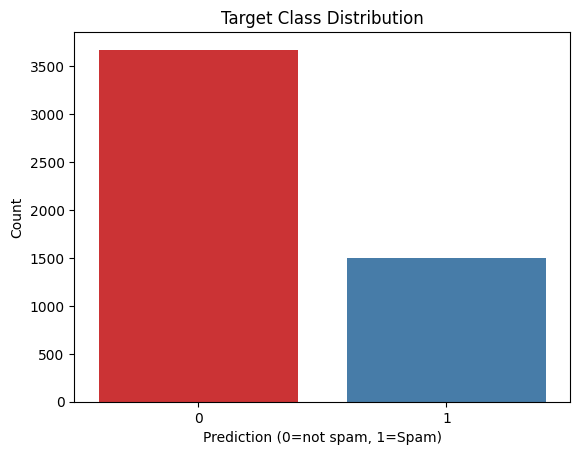

In [ ]:
sns.countplot(x='Prediction', data=df, palette='Set1')

plt.title("Target Class Distribution")
plt.xlabel("Prediction (0=not spam, 1=Spam)")
plt.ylabel("Count")
plt.show()

##### mail word stats

In [ ]:
# Add total word count column per email
features = df.drop(columns=['Email No.', 'Prediction'])

df['TotalWords'] = features.sum(axis=1)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,TotalWords
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,53
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,1,0,0,2203
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,113
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,1019
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,1,0,0,1075


##### top frequent words

<ipython-input-7-1098878800>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')


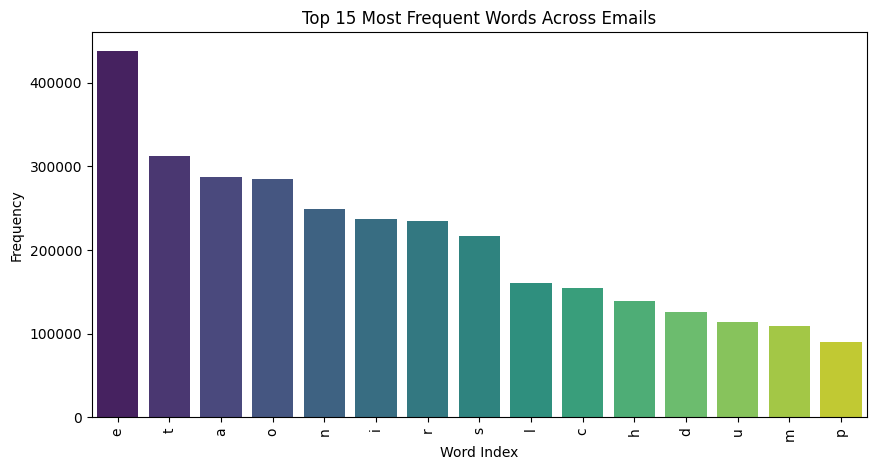

In [ ]:
top_words = features.sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')

plt.title("Top 15 Most Frequent Words Across Emails")
plt.xticks(rotation=90)
plt.xlabel("Word Index")
plt.ylabel("Frequency")
plt.show()

##### correlation anaysis

In [ ]:
# Add target back for correlation
corr_data = features.copy()
corr_data['Prediction'] = df['Prediction']

# Compute correlation
correlation = corr_data.corr()['Prediction'].drop('Prediction').sort_values()

# Top positively correlated
top_pos = correlation.tail(10)

# Top negatively correlated
top_neg = correlation.head(10)

correlation

,Prediction
thanks,-0.271433
hpl,-0.266518
hanks,-0.266070
thank,-0.262384
attached,-0.236558
...,...
ur,0.220253
best,0.221703
able,0.222219
our,0.228187


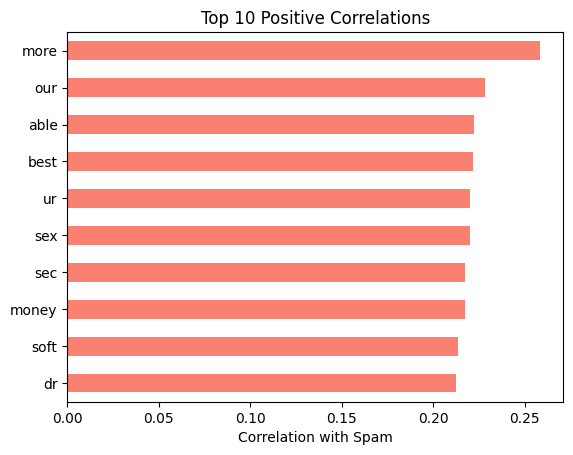

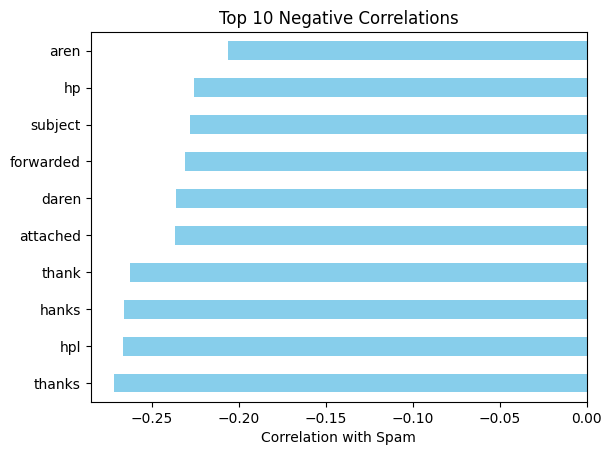

In [ ]:
# Plot
top_pos.plot(kind='barh', color='salmon', title='Top 10 Positive Correlations')
plt.xlabel("Correlation with Spam")
plt.show()

top_neg.plot(kind='barh', color='skyblue', title='Top 10 Negative Correlations')
plt.xlabel("Correlation with Spam")
plt.show()

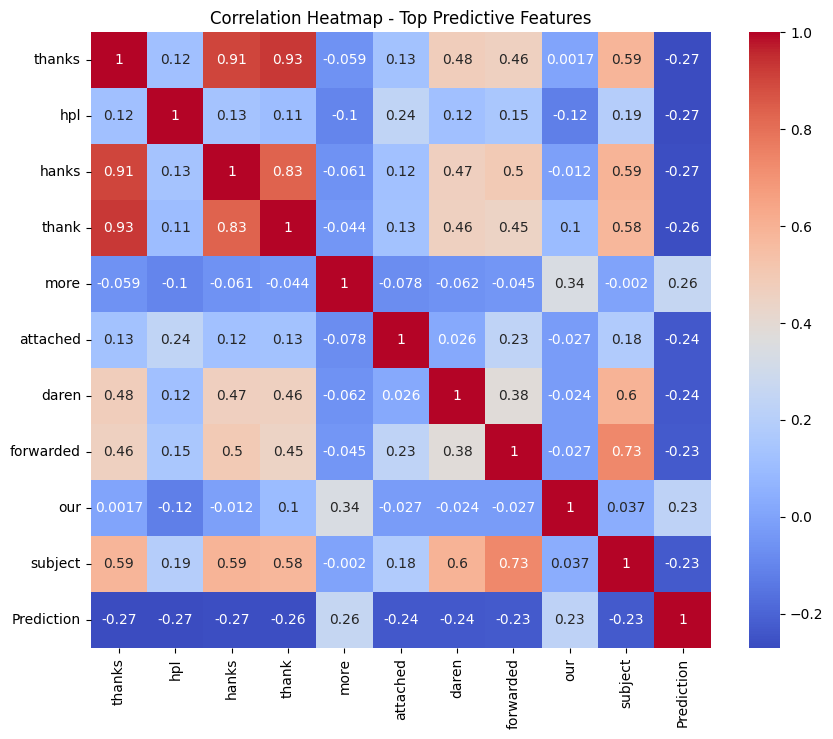

In [ ]:
# Top absolute correlation features
top_features = correlation.abs().sort_values(ascending=False).head(10).index.tolist()
top_features.append('Prediction')

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Top Predictive Features")
plt.show()


top 10 word differences = 
i    30.023673
e    22.413065
a    20.797767
r    20.212952
o    20.046747
s    19.721013
t    17.992468
n    17.548834
l    11.602586
d    10.421307
dtype: float64
--------------------------------------------------


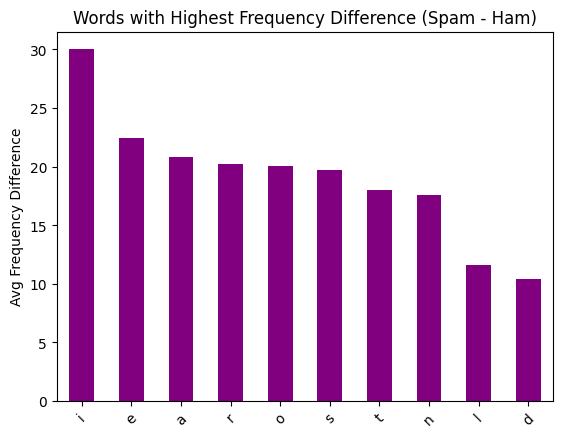

In [ ]:
# Compare average word frequencies for Spam vs Ham
avg_spam = df[df['Prediction'] == 1][features.columns].mean()
avg_ham = df[df['Prediction'] == 0][features.columns].mean()

# print("Avg spam :\n ", avg_spam)
# print("Avg not spam :\n ", avg_ham)

# Get top 10 differences
word_diff = (avg_spam - avg_ham).sort_values(ascending=False).head(10)

print(f"top 10 word differences = \n{word_diff}")
print("-"*50)

word_diff.plot(kind='bar', color='purple')
plt.title("Words with Highest Frequency Difference (Spam - Ham)")
plt.ylabel("Avg Frequency Difference")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
x = df.drop(columns=['Email No.', 'Prediction', 'TotalWords'])  #  independant fetures Exclude ID & derived col
y = df['Prediction'] # target / Dependant feature 1/0

# Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) # stratify :  data splited by predictions categories in equal proporation


In [ ]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_bal.value_counts())


Class distribution after SMOTE:
Prediction
0    2937
1    2937
Name: count, dtype: int64


### model training

#### algorithm 1 : Logistic Regression

In [ ]:
# Train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[720  15]
 [ 12 288]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.95      0.96      0.96       300

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



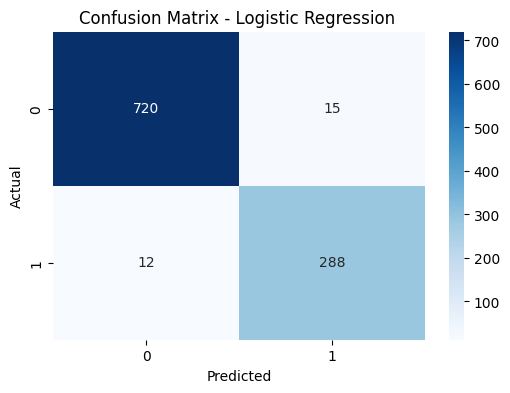

In [ ]:
# Plot for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### algorithm 2 : Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[710  25]
 [  2 298]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       735
           1       0.92      0.99      0.96       300

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.97      0.97      1035



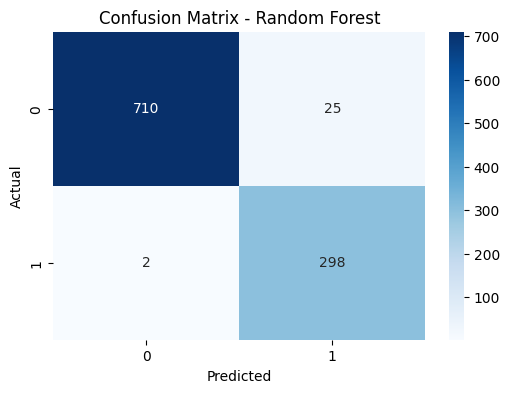

In [ ]:
# Plot for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### algorithm 3 : Multinominal Naive Bayes

In [ ]:
# Instantiate model
nb = MultinomialNB()

# Train on SMOTE-balanced data
nb.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
[[701  34]
 [ 14 286]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       735
           1       0.89      0.95      0.92       300

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.96      0.95      0.95      1035



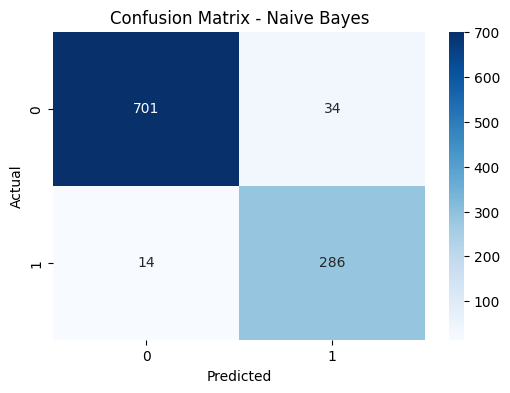

In [ ]:
# Plot for multinominal NB
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

print("Model Accuracy Comparison:")
print(f"Logistic Regression : {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Random Forest       : {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Naive Bayes         : {accuracy_score(y_test, y_pred_nb):.2f}")


Model Accuracy Comparison:
Logistic Regression : 0.97
Random Forest       : 0.97
Naive Bayes         : 0.95


### user defined function for the prediction

In [ ]:
X_train.head(1)

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2588,0,1,1,2,0,0,14,3,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def predict_new_email_rf(email_vector, model, feature_columns):
    email_df = pd.DataFrame([email_vector], columns=feature_columns)

    # Predict
    prediction = model.predict(email_df)[0]

    return "Spam" if prediction == 1 else "Ham"


In [ ]:
new_email = np.zeros(len(x.columns))

new_email[50] = 1  # word_50 is present
new_email[100] = 2 # word_100 appears twice

# Predict
result = predict_new_email_rf(new_email, rf, x.columns)
print("Prediction for new email:", result)

Prediction for new email: Spam


In [ ]:
# Create a zero-vector matching the number of features
new_email = np.zeros(len(x.columns))

new_email[30] = 2  # "meeting"
new_email[89] = 1  # "project"
new_email[150] = 1 # "attached"
new_email[247] = 1 # "schedule"

# Predict
result = predict_new_email_rf(new_email, lr, x.columns)
print("Prediction for new email:", result)

Prediction for new email: Spam


In [ ]:
X_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2588,0,1,1,2,0,0,14,3,0,2,...,0,0,0,0,0,0,0,0,0,0
2532,2,0,2,1,1,0,13,0,0,3,...,0,0,0,0,0,0,0,0,1,0
4500,4,2,1,0,4,0,30,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3597,43,19,1,8,7,7,216,1,3,52,...,0,0,0,0,1,0,4,0,3,0
2721,0,0,1,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,Prediction
2588,0
2532,0
4500,0
3597,1
2721,1
...,...
2639,0
2126,1
3140,0
4582,0


In [ ]:
input_data = X_train.head(1)
input_data

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2588,0,1,1,2,0,0,14,3,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
if rf.predict(input_data)[0] == 0 :
  print("mail is ham (not spam)")
else:
  print("mail is spam")

mail is ham (not spam)


In [ ]:
input_data = X_train.iloc[[4], : ]
input_data

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2721,0,0,1,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
if rf.predict(input_data)[0] == 0 :
  print("mail is ham (not spam)")
else:
  print("mail is spam")

mail is spam
